In [1]:
#PREPROCESSING
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("/content/laptopsData.csv")
df.head()

,Company,Processor,RAM,OperatingSystem,HDD,SSD,ScreenSize,Price
0,DELL,Others,8,AMD,0,256,39.62,29890
1,HP,Ryzen 5,16,AMD,0,256,39.62,46990
2,Acer,Core i5,16,Intel,0,512,39.62,54990
3,Infinix,Others,8,Intel,0,512,39.01,23990
4,Acer,Core i7,16,Intel,0,512,35.56,53990


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          625 non-null    object 
 1   Processor        625 non-null    object 
 2   RAM              625 non-null    int64  
 3   OperatingSystem  625 non-null    object 
 4   HDD              625 non-null    int64  
 5   SSD              625 non-null    int64  
 6   ScreenSize       625 non-null    float64
 7   Price            625 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 39.2+ KB


In [14]:
#no need to remove nulls as there is no null
#remove duplicates
df = df.drop_duplicates()

In [31]:
#check for columns with all null values
cNulls = df.columns[df.isnull().all()]
print("Columns with all null values:", cNulls)

Columns with all null values: Index([], dtype='object')


In [16]:
#drop that coloum
df.drop(columns=['HDD'], inplace=True)
df.head()

,Company,Processor,RAM,OperatingSystem,SSD,ScreenSize,Price
0,DELL,Others,8,AMD,256,39.62,29890
1,HP,Ryzen 5,16,AMD,256,39.62,46990
2,Acer,Core i5,16,Intel,512,39.62,54990
3,Infinix,Others,8,Intel,512,39.01,23990
4,Acer,Core i7,16,Intel,512,35.56,53990


array([[<Axes: title={'center': 'RAM'}>, <Axes: title={'center': 'SSD'}>],
       [<Axes: title={'center': 'ScreenSize'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

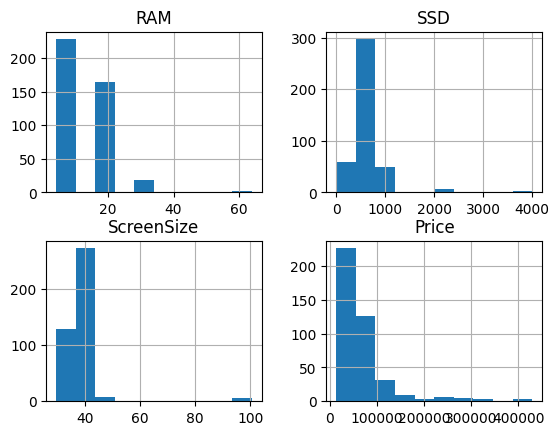

In [17]:
df.hist()

In [32]:
def outliersIQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_outliers_removed

In [33]:
#removing outliers form ssd and screensize
remove = ['SSD', 'ScreenSize']
for column in remove:
    df = outliersIQR(df, column)

df.head()

,Company,Processor,RAM,SSD,ScreenSize,Price,OS_AMD,OS_Apple,OS_Intel
2,Acer,Core i5,16,512,39.62,137475.0,0,0,1
3,Infinix,Others,8,512,39.01,59975.0,0,0,1
4,Acer,Core i7,16,512,35.56,134975.0,0,0,1
6,HP,Others,4,512,39.62,68725.0,0,0,1
7,HP,Ryzen 3,8,512,39.62,83725.0,1,0,0


In [21]:
#one-hot encoding on os
print(df['OperatingSystem'].unique())

df = pd.get_dummies(df, columns=['OperatingSystem'], prefix='OS')

df.head()

['Intel' 'AMD' 'Apple']


,Company,Processor,RAM,SSD,ScreenSize,Price,OS_AMD,OS_Apple,OS_Intel
2,Acer,Core i5,16,512,39.62,54990,0,0,1
3,Infinix,Others,8,512,39.01,23990,0,0,1
4,Acer,Core i7,16,512,35.56,53990,0,0,1
6,HP,Others,4,512,39.62,27490,0,0,1
7,HP,Ryzen 3,8,512,39.62,33490,1,0,0


In [22]:
#converting price to pkr
exchangeRate = 2.5
df['Price'] = df['Price'] * exchangeRate
df.head()

,Company,Processor,RAM,SSD,ScreenSize,Price,OS_AMD,OS_Apple,OS_Intel
2,Acer,Core i5,16,512,39.62,137475.0,0,0,1
3,Infinix,Others,8,512,39.01,59975.0,0,0,1
4,Acer,Core i7,16,512,35.56,134975.0,0,0,1
6,HP,Others,4,512,39.62,68725.0,0,0,1
7,HP,Ryzen 3,8,512,39.62,83725.0,1,0,0


In [27]:
#encoding for Companies and Processor
features = df[['Company', 'Processor', 'RAM', 'SSD', 'ScreenSize', 'OS_AMD', 'OS_Apple', 'OS_Intel']]
target = df['Price']

Encoded = pd.get_dummies(features, columns=['Company', 'Processor'], prefix=['Company', 'Processor'])
dfEncoded = pd.concat([Encoded, target], axis=1)

In [26]:
dfEncoded.head()

,RAM,SSD,ScreenSize,OS_AMD,OS_Apple,OS_Intel,Company_APPLE,Company_ASUS,Company_AXL,Company_Acer,...,Processor_Core i5,Processor_Core i7,Processor_Core i9,Processor_M1 Pro,Processor_Others,Processor_Ryzen 3,Processor_Ryzen 5,Processor_Ryzen 7,Processor_Ryzen 9,Price
2,16,512,39.62,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,137475.0
3,8,512,39.01,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,59975.0
4,16,512,35.56,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,134975.0
6,4,512,39.62,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,68725.0
7,8,512,39.62,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,83725.0


In [28]:
#feature extraction for the target variable price
correlationMatrix = dfEncoded.corr()
corrTarget = correlationMatrix['Price'].abs()
print(corrTarget)

RAM                  0.784656
SSD                       NaN
ScreenSize           0.204278
OS_AMD               0.105209
OS_Apple             0.329124
OS_Intel             0.020743
Company_APPLE        0.329124
Company_ASUS         0.057054
Company_AXL          0.053727
Company_Acer         0.095984
Company_CHUWI        0.033999
Company_DELL         0.085741
Company_GIGABYTE     0.007429
Company_HP           0.132046
Company_Infinix      0.081985
Company_Lenovo       0.076974
Company_MICROSOFT    0.021285
Company_MSI          0.257646
Company_SAMSUNG      0.011398
Company_Ultimus      0.041890
Company_Wings        0.046070
Company_ZEBRONICS    0.053483
Company_realme       0.015249
Processor_Core i3    0.251397
Processor_Core i5    0.115843
Processor_Core i7    0.192802
Processor_Core i9    0.604528
Processor_M1 Pro     0.171170
Processor_Others     0.003865
Processor_Ryzen 3    0.137515
Processor_Ryzen 5    0.127679
Processor_Ryzen 7    0.007958
Processor_Ryzen 9    0.249953
Price     

In [30]:
#selected features
selected = corrTarget[corrTarget > 0.2].index.tolist()
print("Selected Features:", selected)

Selected Features: ['RAM', 'ScreenSize', 'OS_Apple', 'Company_APPLE', 'Company_MSI', 'Processor_Core i3', 'Processor_Core i9', 'Processor_Ryzen 9', 'Price']


In [35]:
df_new = pd.DataFrame(df)
df_new.to_csv('PreprocessedLaptops.csv', index=False)